 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [85]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib as plt

#%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [86]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [87]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [88]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna(axis = 0)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [89]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv,
                              index_col="Date",
                              infer_datetime_format=True,
                              parse_dates=True
)                         
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [90]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [91]:
# Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna(axis = 0)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [92]:
# Reading S&P 500 Closing Prices
sp500_history = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [93]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [94]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [95]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_sp500= sp500_history.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [96]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [97]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500= daily_returns_sp500.rename(columns={"Close":"S&P500"})
daily_returns_sp500.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [98]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns,algo_returns, daily_returns_sp500 ], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

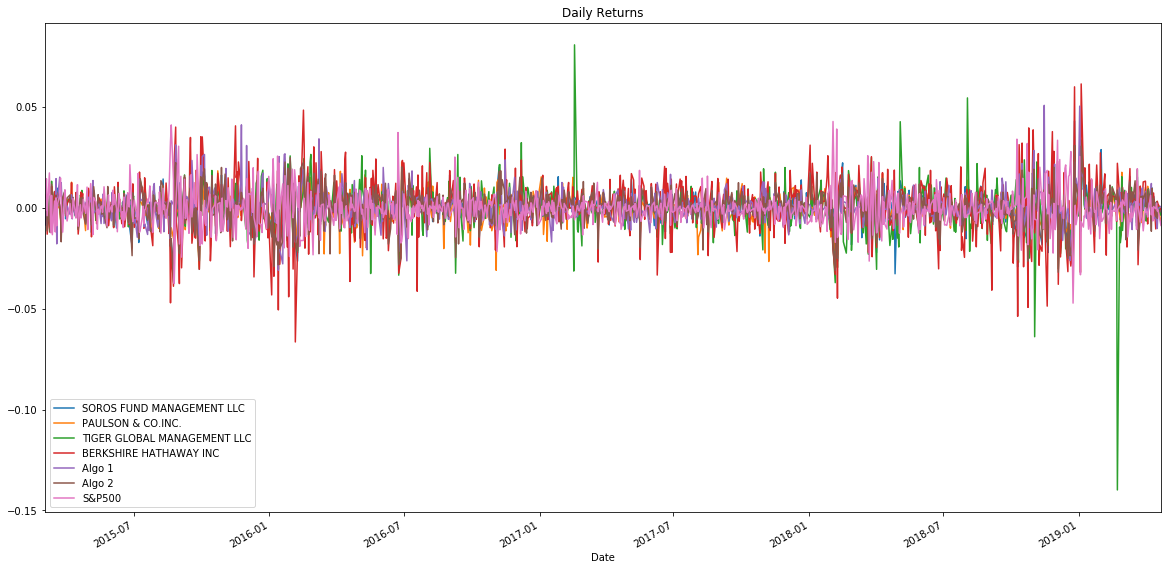

In [99]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10),title= "Daily Returns")


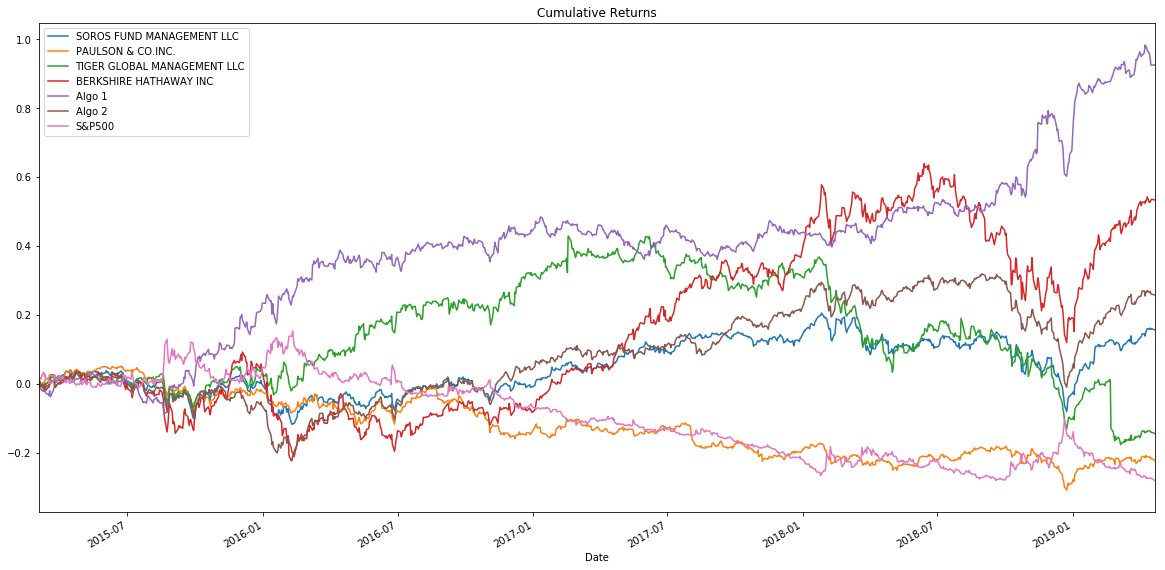

In [100]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10),title= "Cumulative Returns")

In [101]:
cumulative_returns.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2019-04-22,0.15628,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

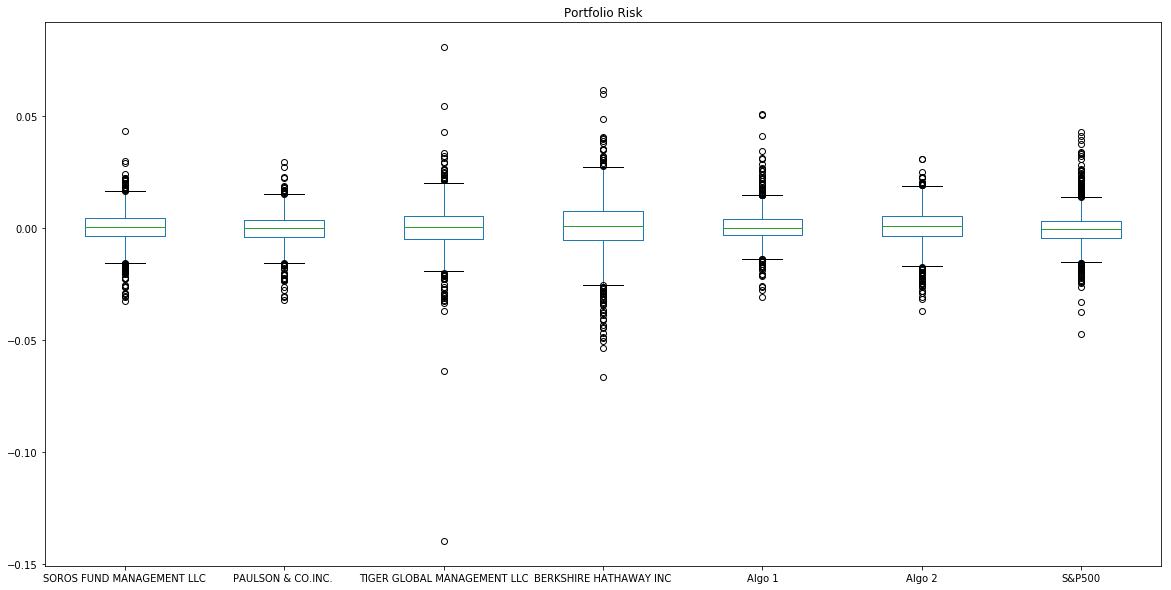

In [102]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [103]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_df.std()
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

In [104]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_portfolio = combined_df["S&P500"].std()
combined_df.std() > riskier_portfolio

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [105]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

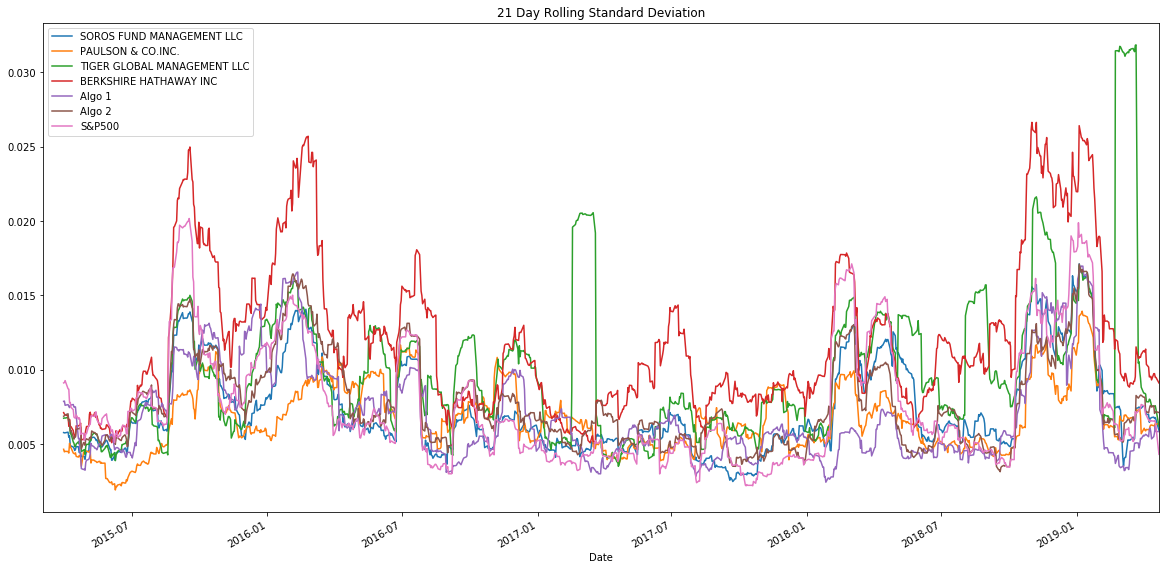

In [106]:
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

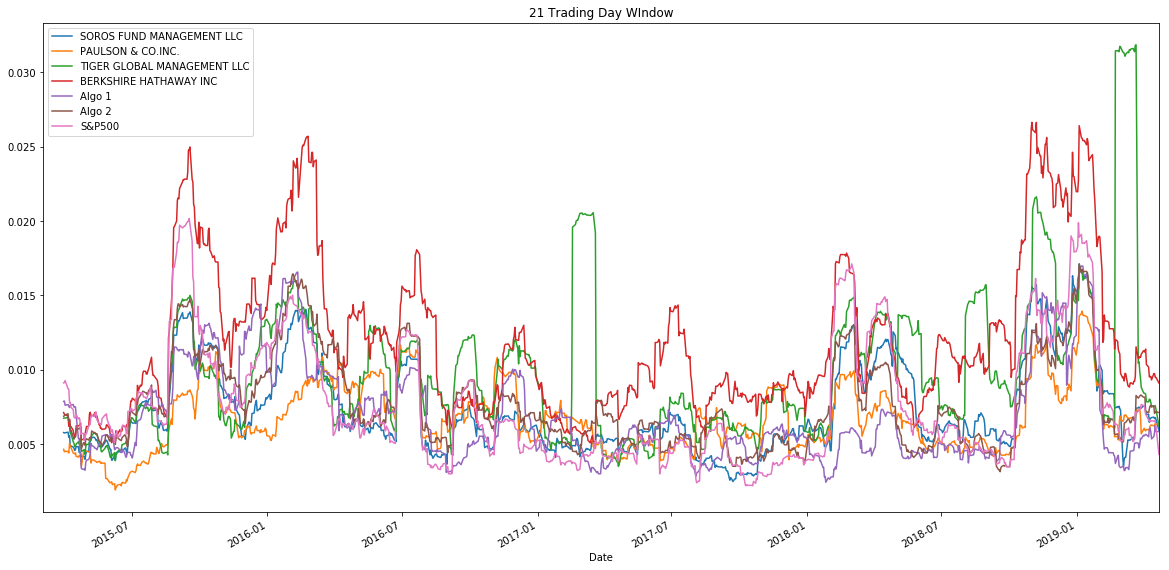

In [107]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Trading Day WIndow")


In [108]:
# Construct a correlation table
# YOUR CODE HERE
corr_table = combined_df.corr()
corr_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


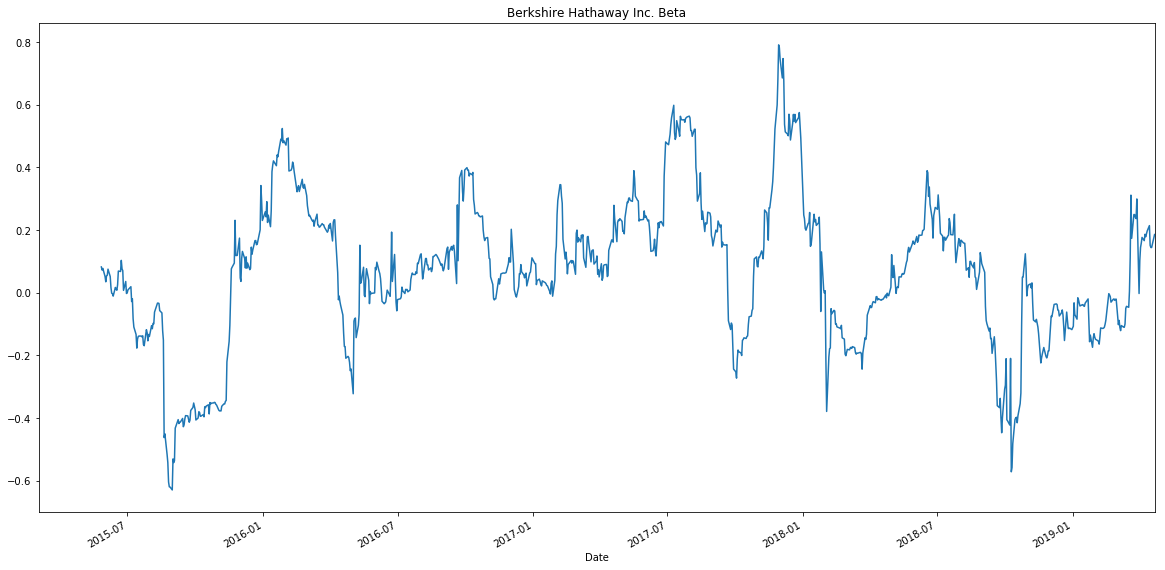

In [109]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
Berk_Hath = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df["S&P500"])
sp_port = combined_df['S&P500'].rolling(window=60).var()
beta = Berk_Hath / sp_port
beta.plot(figsize=(20,10), title='Berkshire Hathaway Inc. Beta')

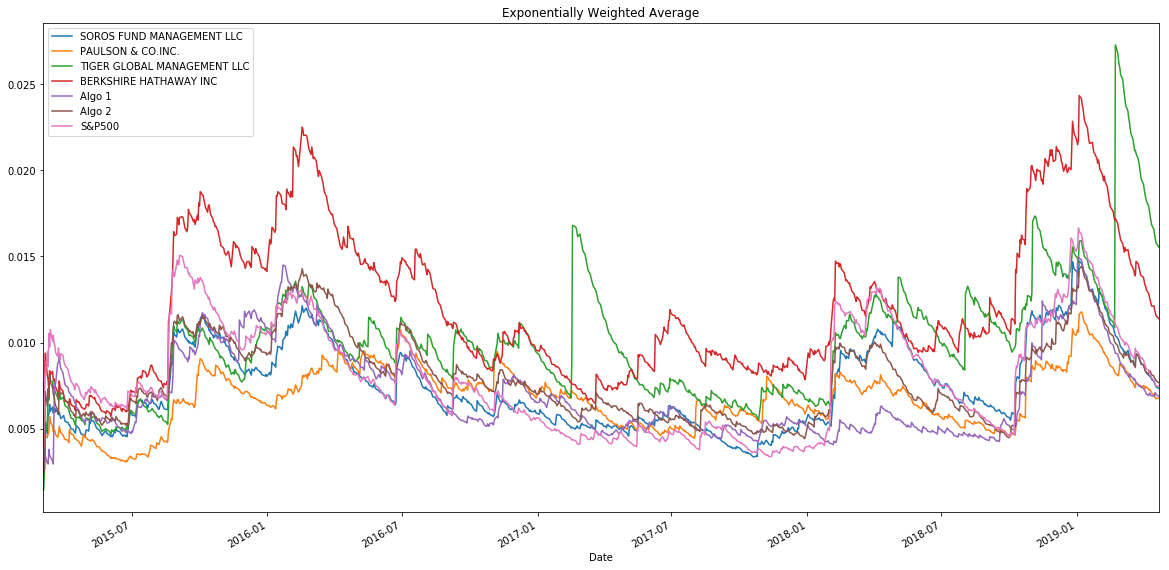

In [110]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [111]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

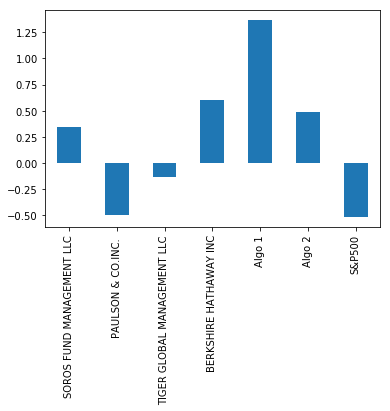

In [112]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind="bar")


On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 
Yes, Algo 1 out performs both market and the whales

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [142]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib as plt

%matplotlib inline

In [143]:
# Read the first stock
# YOUR CODE HERE
amazon_csv = Path("amzn_data.csv")
# YOUR CODE HERE
amazon = pd.read_csv(amazon_csv, infer_datetime_format=True)
amazon['Trade DATE'] = pd.to_datetime(amazon['Trade DATE']).dt.date
amazon.set_index('Trade DATE', inplace=True)
#amazon.rename(columns= {'Close': 'Amazon'},inplace=True)
amazon["Symbol"] = "Amazon"
amazon.head()

,Close,Symbol
Trade DATE,,
2019-10-01,1735.65,Amazon
2019-10-02,1713.23,Amazon
2019-10-03,1724.42,Amazon
2019-10-04,1739.65,Amazon
2019-10-07,1732.66,Amazon


In [144]:
# Read the second stock
tsla_csv = Path("tsla_data.csv")
# YOUR CODE HERE
tsla = pd.read_csv(tsla_csv, infer_datetime_format=True)
tsla['Trade DATE'] = pd.to_datetime(tsla['Trade DATE']).dt.date
tsla.set_index('Trade DATE', inplace=True)
#yahoo.rename(columns= {'Close': 'Yahoo'},inplace=True)
tsla["Symbol"] = "Yahoo"
tsla.head()

,Close,Symbol
Trade DATE,,
2019-10-01,48.94,Yahoo
2019-10-02,48.63,Yahoo
2019-10-03,46.61,Yahoo
2019-10-04,46.29,Yahoo
2019-10-07,47.54,Yahoo


In [145]:
# Read the third stock
intu_csv = Path("intu_data.csv")
# YOUR CODE HERE
intuit = pd.read_csv(intu_csv, infer_datetime_format=True)
intuit['Trade DATE'] = pd.to_datetime(intuit['Trade DATE']).dt.date
intuit.set_index('Trade DATE', inplace=True)
intuit["Symbol"] = "Intuit"
# intuit.rename(columns= {'Close': 'Intuit'},inplace=True)
intuit.head()

,Close,Symbol
Trade DATE,,
2019-10-01,264.30,Intuit
2019-10-02,260.45,Intuit
2019-10-03,263.00,Intuit
2019-10-04,267.09,Intuit
2019-10-07,266.76,Intuit


In [146]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_df = pd.concat([amazon,tsla,intuit], axis='rows', join='inner').sort_index()
custom_df.head()

,Close,Symbol
Trade DATE,,
2019-10-01,1735.65,Amazon
2019-10-01,48.94,Yahoo
2019-10-01,264.30,Intuit
2019-10-02,1713.23,Amazon
2019-10-02,48.63,Yahoo


In [147]:
# Reset the index
# YOUR CODE HERE
custom_df.reset_index()
custom_df

,Close,Symbol
Trade DATE,,
2019-10-01,1735.65,Amazon
2019-10-01,48.94,Yahoo
2019-10-01,264.30,Intuit
2019-10-02,1713.23,Amazon
2019-10-02,48.63,Yahoo
2019-10-02,260.45,Intuit
2019-10-03,1724.42,Amazon
2019-10-03,46.61,Yahoo
2019-10-03,263.00,Intuit


In [156]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
custom_df = custom_df.pivot_table(index='Trade DATE')
custom_df.head()

Symbol,Amazon,Intuit,Yahoo
Trade DATE,,,
2019-10-02,-0.012917,-0.014567,-0.006334
2019-10-03,0.006532,0.009791,-0.041538
2019-10-04,0.008832,0.015551,-0.006865
2019-10-07,-0.004018,-0.001236,0.027004
2019-10-08,-0.015670,-0.021630,0.009886


In [157]:
# Calculate daily returns for each stock
custom_df = custom_df.pct_change()
custom_df.head()

Symbol,Amazon,Intuit,Yahoo
Trade DATE,,,
2019-10-02,NaN,NaN,NaN
2019-10-03,-1.505639,-1.672128,5.557667
2019-10-04,0.352205,0.588370,-0.834719
2019-10-07,-1.454945,-1.079449,-4.933254
2019-10-08,2.899790,16.506478,-0.633886


In [158]:
# Count nulls
custom_df.isnull().sum()

Symbol
Amazon    1
Intuit    1
Yahoo     1
dtype: int64

In [159]:
# Drop Nulls
# YOUR CODE HERE
custom_df.dropna(inplace=True)
custom_df.head()

Symbol,Amazon,Intuit,Yahoo
Trade DATE,,,
2019-10-03,-1.505639,-1.672128,5.557667
2019-10-04,0.352205,0.588370,-0.834719
2019-10-07,-1.454945,-1.079449,-4.933254
2019-10-08,2.899790,16.506478,-0.633886
2019-10-09,-1.616661,-1.533197,0.896148


In [164]:
custom_df.isnull().sum()

Symbol
Amazon    0
Intuit    0
Yahoo     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [176]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
custom_portfolio_returns = custom_df.dot(weights) 
custom_portfolio_returns

Trade DATE
2019-10-03     0.793300
2019-10-04     0.035285
2019-10-07    -2.489216
2019-10-08     6.257461
2019-10-09    -0.751237
2019-10-10    -0.633653
2019-10-11     2.233507
2019-10-14    -0.057733
2019-10-15    -0.155521
2019-10-16    -0.568200
2019-10-17    -0.070967
2019-10-18    -2.218037
2019-10-21    -1.061444
2019-10-22     9.523957
2019-10-23    -1.184154
2019-10-24   -19.105455
2019-10-25    -1.303988
2019-10-28    -1.533677
2019-10-29     7.186386
2019-10-30    -6.370376
2019-10-31    -1.548823
2019-11-01     2.975959
2019-11-04    -0.779313
2019-11-05    -0.968507
2019-11-06   -12.967565
2019-11-07     7.329214
2019-11-08    -0.976724
2019-11-11     2.536722
2019-11-12    -0.402943
2019-11-13    -2.262538
                ...    
2020-08-28    -0.971429
2020-08-31     4.183348
2020-09-01    -1.632373
2020-09-02     0.933433
2020-09-03    -2.832730
2020-09-04    -0.790060
2020-09-08    -2.211372
2020-09-09    -1.667000
2020-09-10    -1.555508
2020-09-11    -0.458840
2020-

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [177]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
#portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = "columns" , join = "inner")
#portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
combined_df_new = combined_df.copy()

In [178]:
combined_df_new["Custom"] = custom_portfolio_returns
combined_df_new

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,NaN
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445,NaN
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112,NaN
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353,NaN


In [126]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df_new = combined_df.copy()
combined_df_new.dropna(inplace=True)
combined_df_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [127]:
# Risk
# YOUR CODE HERE
daily_std = combined_df_new.std() * np.sqrt(252)
daily_std.sort_values(ascending = False)


BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

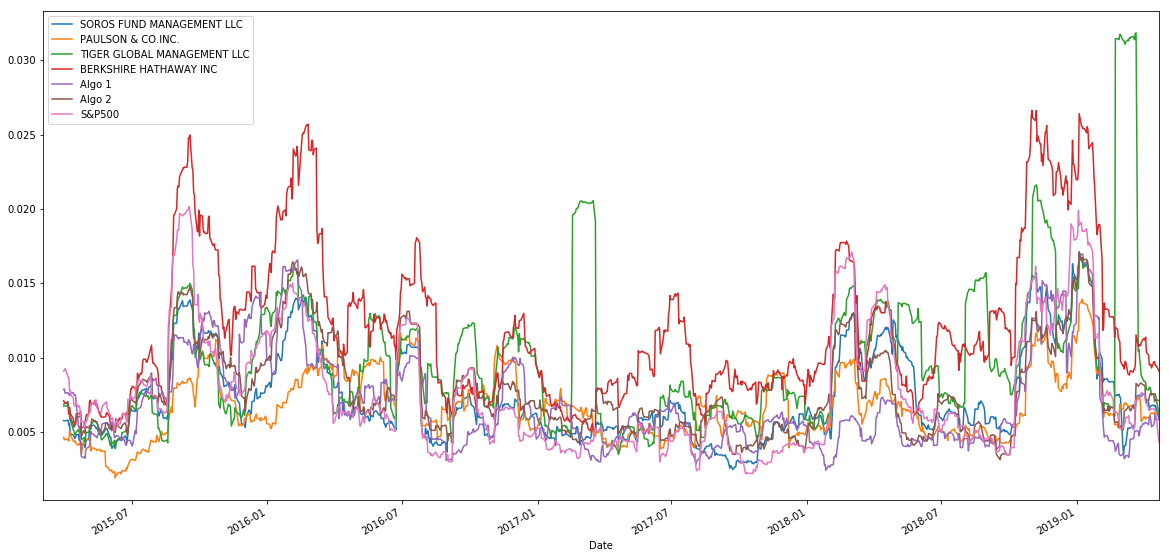

In [128]:
# Rolling
# YOUR CODE HERE
combined_df_new.rolling(window=21).std().plot(figsize = (20, 10))

In [129]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio2 = (combined_df_new.mean() * 252) / (combined_df_new.std() * np.sqrt(252))
sharpe_ratio2

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

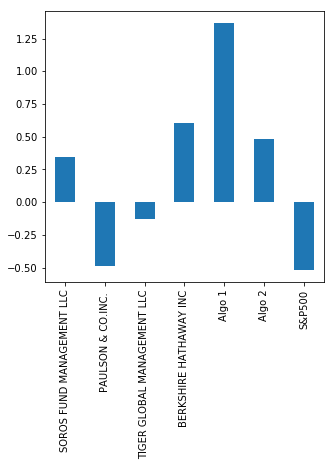

In [130]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio2.plot.bar(figsize=(5,5))

In [131]:
# Create a correlation analysis
# YOUR CODE HERE
corr_table = combined_df_new.corr()
corr_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


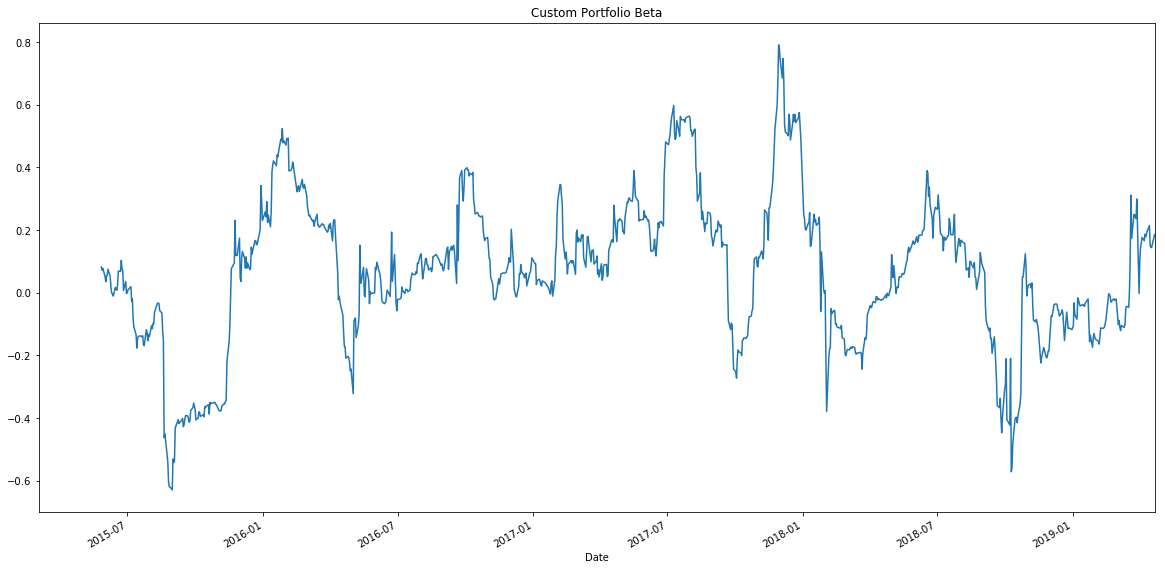

In [183]:
# Beta
# YOUR CODE HERE
covariance_all = combined_df_new["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df_new["S&P500"])
variance_intuit = combined_df_new['S&P500'].rolling(window=60).var()
all_portfolio_beta = covariance_all / variance_intuit
all_portfolio_beta.plot(figsize=(20,10), title="Custom Portfolio Beta")